# Artificial Neural Network

Artificial Neural Networks (ANNs) are computational models inspired by the biological neural networks of the human brain. Comprising interconnected nodes organized in layers, ANNs are adept at learning complex patterns and relationships within data. Each node, or neuron, processes information and transmits it to subsequent layers, where it undergoes further processing. Through a process called training, ANNs adjust the strength of connections between neurons based on input data and desired outputs, thereby enabling them to make predictions, recognize patterns, and solve various tasks including classification, regression, and clustering. ANNs have found widespread application across fields such as image and speech recognition, natural language processing, medical diagnosis, and financial forecasting, revolutionizing industries with their ability to efficiently process and interpret vast amounts of data.

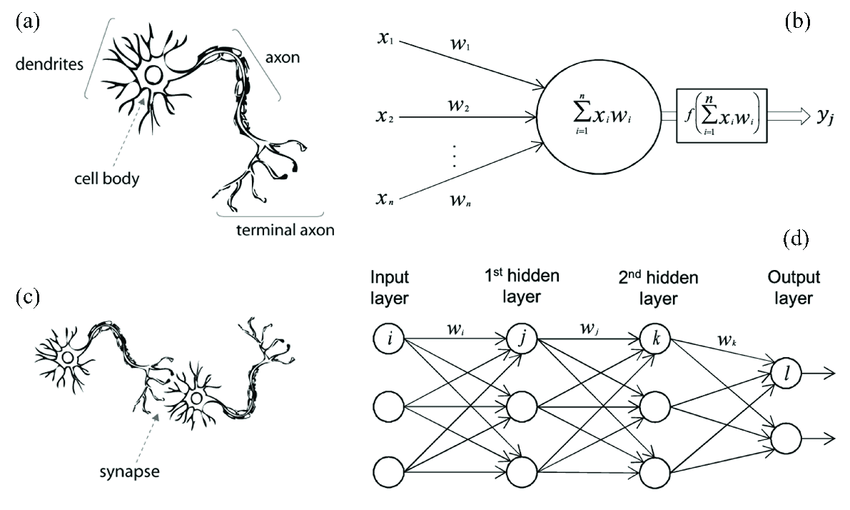

## Gradient Descent's  Role in Training ANN


Gradient descent is a fundamental optimization algorithm crucial to the training process of Artificial Neural Networks (ANNs). It operates by iteratively adjusting the parameters (weights and biases) of the network in the direction that minimizes a predefined loss function. This adjustment is guided by the gradient of the loss function with respect to the network parameters, indicating the direction of steepest descent. By computing this gradient using techniques like backpropagation, the algorithm can efficiently navigate the high-dimensional parameter space to find the optimal set of parameters that minimize the error between the network's predictions and the actual target values. Gradient descent enables ANNs to learn from data by continuously updating their parameters, gradually improving their performance over time. It is a cornerstone of deep learning and has significantly contributed to the remarkable success of ANNs in various applications, making them capable of handling complex tasks and achieving state-of-the-art performance in fields like computer vision, natural language processing, and reinforcement learning.

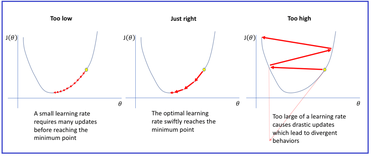



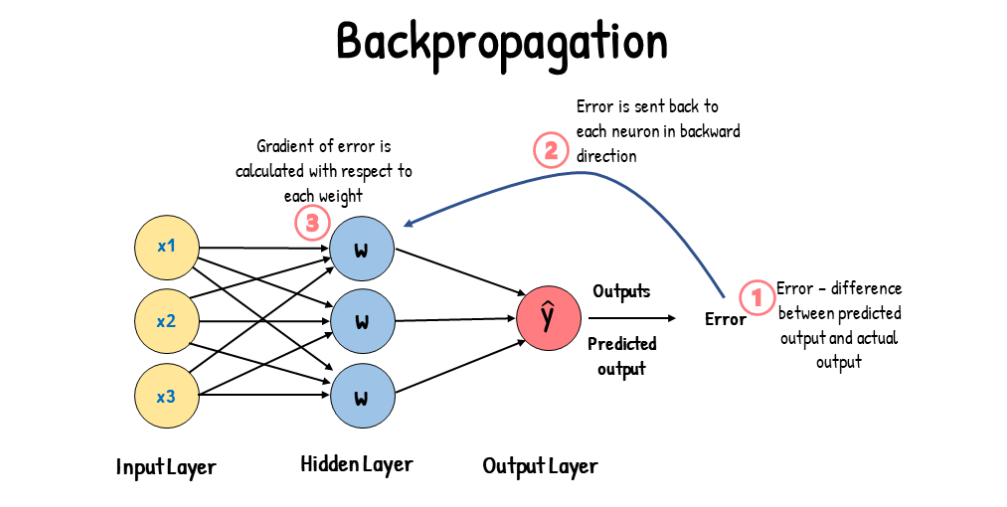

### Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [0]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [0]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [0]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [0]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [0]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [0]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [17]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.5185
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7901
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7952
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7979
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7994
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8119
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8355
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3720 - accura

## Part 4 - Making the predictions and evaluating the model

 Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [18]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predicting the Test set results

In [19]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 200  205]]


0.8605